신경망 방식

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/경정데이터분석/경정 데이터 통합 25,26.csv')

In [ ]:
df.columns

Index(['번호', '등급', '기수', '선수명', '성별', '나이', '체중', '평균착순점', '평균득점', '승률',
       '연대율2', '연대율3', '평균ST/OST', '착순', '평균착순점.1', '연대율', 'F/L', '사고점',
       '금일출주경주', '금회성적(1일째)', '출주횟수', '1코스', '2코스', '3코스', '4코스', '5코스', '6코스',
       '모터성적번호', '평균착순점.2', '연대율2.1', '연대율3.1', '전 탑승선수/착순', '전 탑승선수/착순.1',
       '보트성적번호', '평군착순점', '연대율.1', '착순.1', '단승식', '연승식', '연승식.1', '쌍승식', '복승식',
       '삼복승식', '쌍복승식', '삼쌍승식'],
      dtype='object')

In [ ]:
df_x = df[['번호', '등급','성별', '나이', '체중', '평균착순점', '평균득점', '승률',
       '연대율2', '연대율3', '평균ST/OST', '평균착순점.1', '연대율', '사고점','평균착순점.2', '연대율2.1', '연대율3.1','평군착순점', '연대율.1']]

In [ ]:
df_x

,번호,등급,성별,나이,체중,평균착순점,평균득점,승률,연대율2,연대율3,평균ST/OST,평균착순점.1,연대율,사고점,평균착순점.2,연대율2.1,연대율3.1,평군착순점,연대율.1
0,1,A1,남,37,58,7.68,7.58,42.1,57.9,89.5,0.16,7.22,58.7,0.17,5.08,30.8,46.2,6.60,50.0
1,2,B2,남,58,52,5.53,5.38,0.0,23.5,64.7,0.25,5.03,26.3,0.16,3.00,8.3,16.7,6.33,55.6
2,3,B1,남,52,56,5.79,5.66,15.8,36.8,57.9,0.18,5.82,34.1,0.13,7.45,72.7,81.8,5.00,25.0
3,4,A1,남,45,57,6.12,5.18,35.3,47.1,52.9,0.16,5.55,36.4,0.50,5.67,33.3,66.7,4.57,28.6
4,5,B2,여,28,45,4.18,4.06,11.8,11.8,35.3,0.21,4.16,10.5,0.21,5.80,20.0,60.0,3.89,11.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2,B1,남,32,56,6.33,6.17,0.0,66.7,66.7,18.06,6.00,66.7,0.00,3.00,20.0,20.0,5.20,20.0
404,3,B2,남,35,54,4.83,4.67,16.7,33.3,50.0,18.14,5.50,50.0,0.00,3.44,11.1,33.3,5.10,30.0
405,4,B2,남,41,62,3.83,3.17,0.0,0.0,33.3,18.20,4.00,0.0,1.00,4.60,20.0,40.0,2.55,0.0
406,5,A2,여,42,55,7.33,7.17,50.0,50.0,83.3,18.13,10.00,100.0,0.00,5.33,0.0,66.7,5.60,30.0


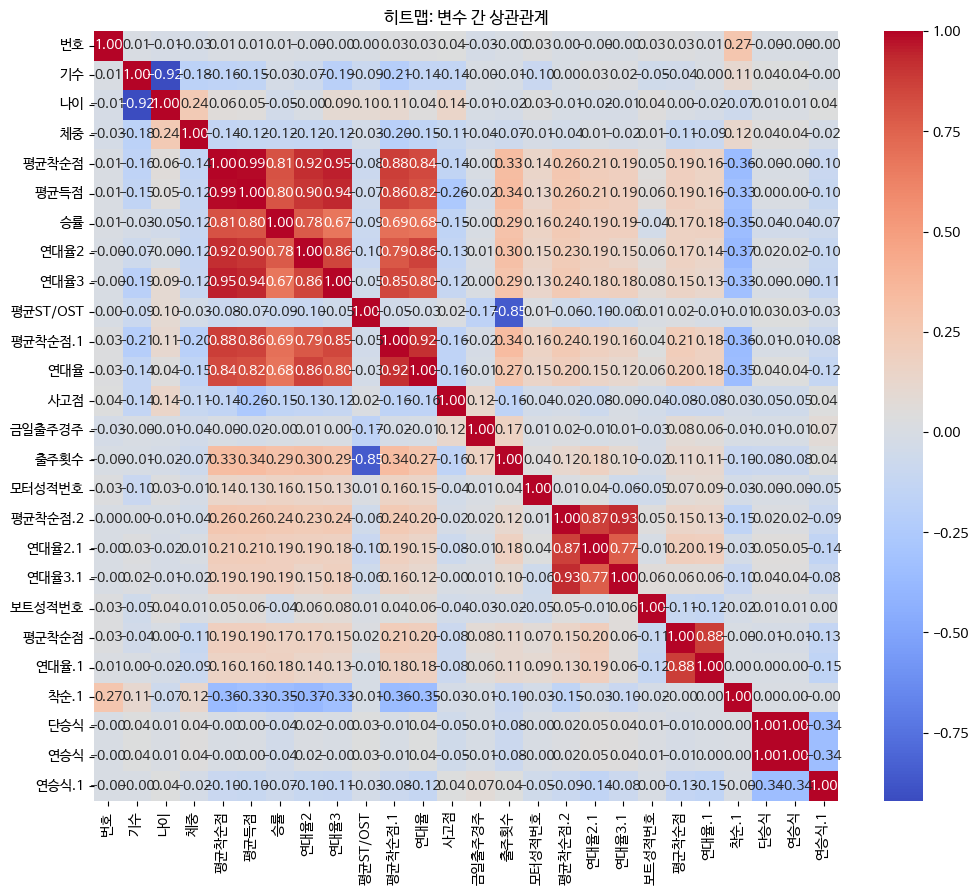

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# 숫자 데이터만 선택
numeric_df = df.select_dtypes(include=[float, int])

# 상관계수 행렬 계산
corr = numeric_df.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('히트맵: 변수 간 상관관계')
plt.show()

In [ ]:
df_x

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

le_grade = LabelEncoder()
le_gender = LabelEncoder()

df_x['등급'] = le_grade.fit_transform(df_x['등급'])
df_x['성별'] = le_gender.fit_transform(df_x['성별'])

scaler = StandardScaler()

features_to_scale = ['나이', '체중', '평균착순점', '평균득점', '승률', '연대율2', '연대율3', '평균ST/OST',
                      '평균착순점.1', '연대율', '사고점', '평균착순점.2', '연대율2.1', '연대율3.1',
                      '평군착순점', '연대율.1']

df_x[features_to_scale] = scaler.fit_transform(df_x[features_to_scale])

# 특성과 목표 변수 정의
X = df_x[['번호', '등급', '성별'] + features_to_scale]
y = df['착순.1']


<ipython-input-11-cb562a121ea4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['등급'] = le_grade.fit_transform(df_x['등급'])
<ipython-input-11-cb562a121ea4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['성별'] = le_gender.fit_transform(df_x['성별'])
<ipython-input-11-cb562a121ea4>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
X

In [ ]:
def preprocess_data(dataframe, num_players=6, num_features=19):
    # 데이터프레임을 numpy 배열로 변환
    data_array = dataframe.values
    # 데이터를 배치 크기에 맞게 reshape
    data_array = data_array.reshape(-1, num_players, num_features)
    return data_array

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
class CustomDataset(Dataset):
    def __init__(self, dataframe,target, num_players=6):
        self.data = preprocess_data(dataframe, num_players=num_players)
        # targets는 예시일 뿐이며, 필요에 따라 다르게 처리할 수 있음
        self.targets = target.values.reshape(-1, num_players)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        X = torch.tensor(self.data[index], dtype=torch.float32)
        y = torch.tensor(self.targets[index], dtype=torch.float32)
        return X, y

In [ ]:
# 데이터셋과 데이터로더 설정
batch_size = 2
num_players = 6
num_features = 19

# 예시 데이터프레임을 사용하여 데이터셋 생성
dataset = CustomDataset(df_x, y, num_players=num_players)

In [ ]:
import torch
from torch.utils.data import random_split, DataLoader
dataset_size = len(dataset)

# 나눌 비율 설정 (80% train, 20% test)
train_size = int(0.8 * dataset_size)
test_size = dataset_size - train_size

# 데이터셋 나누기
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# DataLoader 생성
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
class CustomDataset(Dataset):
    def __init__(self, features_dataframe, targets_dataframe):
        self.features = features_dataframe.values
        self.targets = targets_dataframe.values
    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):
        X = torch.tensor(self.features[index], dtype=torch.float32)
        y = torch.tensor(self.targets[index], dtype=torch.float32)
        return X, y

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [ ]:
class RankingModel(nn.Module):
    def __init__(self, num_features, num_players):
        super(RankingModel, self).__init__()
        # 각 선수의 특성 벡터를 독립적으로 처리하는 레이어
        self.dense_layers = nn.ModuleList([nn.Linear(num_features, 64) for _ in range(num_players)])
        # 결합된 벡터를 처리하는 히든 레이어
        self.hidden_layer = nn.Linear(64 * num_players, 64)
        self.hidden_layer2 = nn.Linear(64, 64)
        self.hidden_layer3 = nn.Linear(64, 64)
        # 최종 순위를 예측하는 출력 레이어
        self.output_layer = nn.Linear(64, num_players)

    def forward(self, x):
        # 각 선수의 특성 벡터를 Dense 레이어에 통과시킴
        dense_outputs = [torch.relu(layer(x[:, i, :])) for i, layer in enumerate(self.dense_layers)]
        # 결합된 벡터를 하나로 연결
        concat_output = torch.cat(dense_outputs, dim=1)
        # 히든 레이어를 통과
        hidden_output = torch.relu(self.hidden_layer(concat_output))
        hidden_output2 = torch.relu(self.hidden_layer2(hidden_output))
        hidden_output3 = torch.relu(self.hidden_layer3(hidden_output2))
        # 출력 레이어를 통과해 순위 예측
        output = self.output_layer(hidden_output3)
        return output


In [ ]:
num_features = 19
num_players = 6
model = RankingModel(num_features, num_players)

In [ ]:
model

RankingModel(
  (dense_layers): ModuleList(
    (0-5): 6 x Linear(in_features=19, out_features=64, bias=True)
  )
  (hidden_layer): Linear(in_features=384, out_features=64, bias=True)
  (hidden_layer2): Linear(in_features=64, out_features=64, bias=True)
  (hidden_layer3): Linear(in_features=64, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=6, bias=True)
)

In [ ]:
# 모델 초기화
model = RankingModel(num_features, num_players)

# 손실 함수 및 옵티마이저 설정
criterion = nn.MSELoss()  # 순위를 예측하는 회귀 문제로 MSE 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습
num_epochs= 200

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X_batch.size(0)

    epoch_loss = running_loss / len(dataset)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')


Epoch [1/200], Loss: 8.8890
Epoch [2/200], Loss: 2.5512
Epoch [3/200], Loss: 2.2142
Epoch [4/200], Loss: 2.1785
Epoch [5/200], Loss: 2.1415
Epoch [6/200], Loss: 2.1248
Epoch [7/200], Loss: 2.0966
Epoch [8/200], Loss: 2.0930
Epoch [9/200], Loss: 2.0865
Epoch [10/200], Loss: 2.0278
Epoch [11/200], Loss: 1.8885
Epoch [12/200], Loss: 1.7491
Epoch [13/200], Loss: 1.6114
Epoch [14/200], Loss: 1.4596
Epoch [15/200], Loss: 1.3087
Epoch [16/200], Loss: 1.2253
Epoch [17/200], Loss: 1.0611
Epoch [18/200], Loss: 0.9156
Epoch [19/200], Loss: 0.8511
Epoch [20/200], Loss: 0.7062
Epoch [21/200], Loss: 0.5996
Epoch [22/200], Loss: 0.5457
Epoch [23/200], Loss: 0.4721
Epoch [24/200], Loss: 0.4348
Epoch [25/200], Loss: 0.3817
Epoch [26/200], Loss: 0.3172
Epoch [27/200], Loss: 0.2555
Epoch [28/200], Loss: 0.2040
Epoch [29/200], Loss: 0.1467
Epoch [30/200], Loss: 0.1124
Epoch [31/200], Loss: 0.1146
Epoch [32/200], Loss: 0.1204
Epoch [33/200], Loss: 0.0732
Epoch [34/200], Loss: 0.0583
Epoch [35/200], Loss: 0

In [ ]:
df_x[0:6].values.shape

In [ ]:
df_x[0:6]

In [ ]:
def evaluate_model(model, test_loader, criterion):
    model.eval()  # 모델을 평가 모드로 전환
    total_loss = 0.0
    num_batches = len(test_loader)

    with torch.no_grad():  # 평가 시에는 gradient 계산을 비활성화하여 메모리 사용을 줄임
        for X_batch, y_batch in test_loader:
            # 모델로 예측 수행
            outputs = model(X_batch)

            # 손실 계산
            loss = criterion(outputs, y_batch)
            total_loss += loss.item()

    # 평균 손실 계산
    average_loss = total_loss / num_batches
    return average_loss

# 모델 성능 평가
test_loss = evaluate_model(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.4f}")

In [ ]:
with torch.no_grad():
  for X_batch, y_batch in test_loader:
    outputs = model(X_batch)
    print(outputs)
    print(y_batch)


In [ ]:
# 새로운 데이터에 대한 예측
# X_new = torch.tensor(np.random.rand(1, num_players, num_features), dtype=torch.float32)
X_new = torch.tensor(df_x[0:6].values,dtype=torch.float32).unsqueeze(0)
print(X_new.shape)
model.eval()  # 모델을 평가 모드로 전환
with torch.no_grad():
    y_pred = model(X_new)

# 각 선수의 예측된 순위
print("Predicted ranks for each player:", y_pred.numpy())


torch.Size([1, 6, 19])
Predicted ranks for each player: [[2.2276006 2.232606  1.4516823 2.0570178 4.167113  4.859486 ]]


In [ ]:
y_pred

In [ ]:
df['착순.1'][0:6]

,착순.1
0,2
1,6
2,3
3,1
4,5
5,4


In [ ]:
# 예측된 순위를 정렬하여 최종 순위 결정
final_ranks = np.argsort(y_pred.numpy()[0]) + 1  # 1등부터 5등까지
print("Final ranks:", final_ranks)


XGBOOST 방식

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# 전체 데이터를 담을 리스트 초기화
all_features = []
all_targets = []

# train_dataset에서 데이터 추출
for i in range(len(train_dataset)):
    features, target = train_dataset[i]
    all_features.append(features.numpy())  # Tensor를 NumPy 배열로 변환하여 추가
    all_targets.append(target.numpy())  # Tensor를 NumPy 배열로 변환하여 추가

# 리스트를 NumPy 배열로 변환
x_train = np.array(all_features)
y_train = np.array(all_targets)
x_train = x_train.reshape(x_train.shape[0], -1)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

In [ ]:
# 전체 데이터를 담을 리스트 초기화
all_features = []
all_targets = []

# train_dataset에서 데이터 추출
for i in range(len(test_dataset)):
    features, target = test_dataset[i]
    all_features.append(features.numpy())  # Tensor를 NumPy 배열로 변환하여 추가
    all_targets.append(target.numpy())  # Tensor를 NumPy 배열로 변환하여 추가

# 리스트를 NumPy 배열로 변환
x_test = np.array(all_features)
y_test= np.array(all_targets)
x_test = x_test.reshape(x_test.shape[0], -1)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

In [ ]:
# 예시 데이터 생성
num_features = 10
num_players = 5

# 입력 데이터: 5명의 선수에 대한 특성 벡터 (batch_size x num_players x num_features)
X = np.random.rand(1000, num_players, num_features)  # 1000개의 경기를 학습 데이터로 가정
y = np.random.randint(1, 6, size=(1000, num_players))  # 1~5 순위로 랜덤 생성

# 3차원 데이터를 2차원으로 변환
# X 데이터를 (batch_size, num_players * num_features) 형태로 변환
X_flattened = X.reshape(X.shape[0], -1)

# 각 선수의 순위를 예측하는 회귀 문제로 변환
y_flattened = y.reshape(y.shape[0], -1)
# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y_flattened, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

In [ ]:
X_train

In [ ]:
train_dataset

In [ ]:
y_train.shape

In [ ]:
# XGBoost를 사용한 모델 학습
# 각 선수에 대해 하나의 모델을 학습하는 것이 아니라, 모든 순위를 예측하는 하나의 회귀 모델을 학습
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# 모델 학습
model.fit(x_train, y_train)


In [ ]:
# 테스트 데이터에 대한 예측
y_pred = model.predict(x_test)

# MSE로 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


In [ ]:
model.predict(x_train[0:1])

In [ ]:
y_train[0:1]

In [ ]:
# 새로운 데이터에 대한 예측
X_new = np.random.rand(1, num_players * num_features)  # 새로운 경기의 선수 특성 벡터
y_pred_new = model.predict(X_new)

# 예측된 순위 출력
print("Predicted ranks for each player:", y_pred_new)


In [ ]:
# 예측된 순위를 정렬하여 최종 순위 결정
final_ranks = np.argsort(y_pred_new[0]) + 1  # 1등부터 5등까지
print("Final ranks:", final_ranks)


In [ ]:
pip install pycaret

In [ ]:
import pandas as pd
a = pd.read_csv('/content/drive/MyDrive/경정데이터분석/경주결과.csv')

In [ ]:
y = a['착순.1']

In [ ]:
a.drop(['착순.1'], axis=1, inplace=True)

In [ ]:
pip install pycaret

In [ ]:
import pandas as pd
from pycaret.regression import *
# X_train을 DataFrame으로 변환
X_train_df = df_x

# y_train을 Series로 변환
y_train_series = df['착순.1']

# 데이터 통합
data = X_train_df.copy()
data['target'] = y_train_series

# PyCaret 설정
setup_rgs = setup(data=data, target='target', session_id=42)

# 여러 모델을 비교하고 상위 5개의 모델을 선택
top5 = compare_models(sort='MSE', n_select=5)